In [3]:
import pandas as pd
import collections

In [4]:
vodafone_attendences_df = pd.read_parquet("../experiments/datasets/vodafone/vodafone_attendences.parquet", engine='pyarrow')
vodafone_attendences_df

,date,locType,locId,userCountry,userProfile,userCluster,value
0,2022-01-01,AL_2,22,ALB,COMMUTER,None,0
1,2022-01-01,AL_2,22,ALB,TOURIST,None,862
2,2022-01-01,AL_2,22,ALB,VISITOR,None,44
3,2022-01-01,AL_2,22,AND,TOURIST,None,0
4,2022-01-01,AL_2,22,AND,VISITOR,None,0
...,...,...,...,...,...,...,...
4584498,2024-03-31,TN_MKT_POI,STAZ_TREN,SRB,VISITOR,UE,0
4584499,2024-03-31,TN_MKT_POI,STAZ_TREN,SWE,TOURIST,UE,0
4584500,2024-03-31,TN_MKT_POI,STAZ_TREN,SWE,VISITOR,UE,0
4584501,2024-03-31,TN_MKT_POI,STAZ_TREN,USA,TOURIST,None,0


In [5]:
START_DATE = "2023-07-01"
END_DATE = "2023-09-30"

LOC_ID_COMUNE_MOLVENO = "27"
LOC_TYPE_COMUNE_MOLVENO = "TN_MKT_AL_3"

In [6]:
attendences_df = vodafone_attendences_df[
    (vodafone_attendences_df['date'] >= START_DATE) &
    (vodafone_attendences_df['date'] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    (vodafone_attendences_df["userProfile"] != 'INHABITANT') &
    (vodafone_attendences_df["userProfile"] != 'COMMUTER') &
    (vodafone_attendences_df["locId"] == LOC_ID_COMUNE_MOLVENO) &
    (vodafone_attendences_df["locType"] == LOC_TYPE_COMUNE_MOLVENO)
]
attendences_df = attendences_df[['date','userProfile','value']]
attendences_df

,date,userProfile,value
2977735,2023-07-01,TOURIST,18
2977736,2023-07-01,VISITOR,18
2977744,2023-07-01,TOURIST,108
2977745,2023-07-01,VISITOR,36
2977746,2023-07-01,TOURIST,216
...,...,...,...
3619685,2023-09-30,TOURIST,929
3619686,2023-09-30,VISITOR,1358
3619697,2023-09-30,TOURIST,25
3619698,2023-09-30,VISITOR,25


In [7]:
tourist_attendences_df = attendences_df[attendences_df['userProfile'] == "TOURIST"][['date','value']].groupby('date').sum()
tourist_attendences_df['weakday'] = pd.to_datetime(tourist_attendences_df.index).weekday
tourist_attendences_df

,value,weakday
date,,
2023-07-01,2924,5
2023-07-02,2987,6
2023-07-03,2544,0
2023-07-04,2547,1
2023-07-05,2762,2
...,...,...
2023-09-26,1183,1
2023-09-27,1070,2
2023-09-28,1083,3


In [8]:
excursionist_attendences_df = attendences_df[attendences_df['userProfile'] == "VISITOR"][['date','value']].groupby('date').sum()
excursionist_attendences_df['weakday'] = pd.to_datetime(excursionist_attendences_df.index).weekday
excursionist_attendences_df

,value,weakday
date,,
2023-07-01,1944,5
2023-07-02,4300,6
2023-07-03,2413,0
2023-07-04,1958,1
2023-07-05,2167,2
...,...,...
2023-09-26,763,1
2023-09-27,899,2
2023-09-28,1089,3


In [9]:
meteotrentino_bollettino_df = pd.read_parquet("../experiments/datasets/meteo/meteotrentino_bollettino.parquet", engine='pyarrow')
meteotrentino_bollettino_df

,data,comune,ambito,meteo,tmin,tmax,probprec06-12,intprec06-12,probtemp06-12,probprec12-18,intprec12-18,probtemp12-18
0,2018-03-03,BASELGA DI PINE',TRENTO,Molto nuvoloso,-4,2,molto bassa,debole,--,molto bassa,debole,--
1,2018-03-03,CANAZEI,MADONNA,Molto nuvoloso,-6,4,molto bassa,debole,--,molto bassa,debole,--
2,2018-03-03,CAVALESE,FIEMME,Molto nuvoloso,-4,3,molto bassa,debole,--,molto bassa,debole,--
3,2018-03-03,FOLGARIA,ALTIPIANO,Molto nuvoloso,-3,2,molto bassa,debole,--,molto bassa,debole,--
4,2018-03-03,FONDO,VALDINON,Molto nuvoloso,-4,3,molto bassa,debole,--,molto bassa,debole,--
...,...,...,...,...,...,...,...,...,...,...,...,...
41408,2024-05-31,COMANO TERME,GARDA,Coperto con piogge moderate,12,15,alta,forte,bassa,alta,moderata,bassa
41409,2024-05-31,BEZZECCA,GARDA,Coperto con piogge moderate,11,14,alta,forte,bassa,alta,moderata,bassa
41410,2024-05-31,PIEVE DI BONO,MADONNA,Coperto con piogge moderate,13,16,alta,forte,bassa,alta,moderata,bassa
41411,2024-05-31,CENTA SAN NICOLO,ALTIPIANO,Coperto con piogge moderate,11,14,alta,forte,bassa,alta,moderata,bassa


In [10]:
meteo_df = meteotrentino_bollettino_df[
    (meteotrentino_bollettino_df["comune"].str.contains("MOLVENO")) &
    (meteotrentino_bollettino_df["data"] >= START_DATE) &
    (meteotrentino_bollettino_df["data"] <= END_DATE)
][['data', 'probprec06-12']].set_index('data')
meteo_df

,probprec06-12
data,
2023-07-01,media
2023-07-04,molto bassa
2023-07-06,media
2023-07-08,media
2023-07-11,molto bassa
2023-07-14,molto bassa
2023-07-15,molto bassa
2023-07-16,molto bassa
2023-07-17,molto bassa


In [11]:
freq = dict(collections.Counter(meteo_df['probprec06-12'].values))
freq.pop('--')

size = sum(freq.values())
meteo_dist = { k: v/size for k,v in freq.items() }

meteo_dist

{'media': 0.075, 'molto bassa': 0.65, 'bassa': 0.2, 'alta': 0.075}

In [12]:
tourist_attendences_meteo_df = pd.merge(tourist_attendences_df, meteo_df, how='outer', left_index=True, right_index=True).fillna('--')
tourist_attendences_meteo_df

,value,weakday,probprec06-12
2023-07-01,2924,5,media
2023-07-02,2987,6,--
2023-07-03,2544,0,--
2023-07-04,2547,1,molto bassa
2023-07-05,2762,2,--
...,...,...,...
2023-09-26,1183,1,--
2023-09-27,1070,2,--
2023-09-28,1083,3,--
2023-09-29,1526,4,--


In [13]:
excursionist_attendences_meteo_df = pd.merge(excursionist_attendences_df, meteo_df, how='outer', left_index=True, right_index=True).fillna('--')
excursionist_attendences_meteo_df

,value,weakday,probprec06-12
2023-07-01,1944,5,media
2023-07-02,4300,6,--
2023-07-03,2413,0,--
2023-07-04,1958,1,molto bassa
2023-07-05,2167,2,--
...,...,...,...
2023-09-26,763,1,--
2023-09-27,899,2,--
2023-09-28,1089,3,--
2023-09-29,703,4,--


In [14]:
def compute_stats(attendences_meteo_df):
    presences_stats = {}
    
    sample = attendences_meteo_df[['value']]
    (mean, std) = (sample.mean().value, sample.std().value)
    presences_stats[-1, "*"] = {'mean':mean, 'std':std}
    
    for w in range(7):
        sample = attendences_meteo_df[attendences_meteo_df['weakday']==w][['value']]
        (mean, std) = (sample.mean().value, sample.std().value)
        presences_stats[w, "*"] = {'mean':mean, 'std':std}
        
    for p in attendences_meteo_df['probprec06-12'].unique():
        if p == '--': continue
        sample = attendences_meteo_df[attendences_meteo_df['probprec06-12']==p][['value']]
        (mean, std) = (sample.mean().value, sample.std().value)
        presences_stats[-1, p] = {'mean':mean, 'std':std}
        
        for w in range(7):
            sample = attendences_meteo_df[(attendences_meteo_df['weakday']==w) &
                 (attendences_meteo_df['probprec06-12']==p)][['value']]
            if len(sample) == 0:
                (mean, std) = ((presences_stats[w, '*']['mean'] + presences_stats[-1,p]['mean']) * 0.5,
                               (presences_stats[w, '*']['std'] * presences_stats[-1,p]['std']) ** 0.5)
            elif len(sample) == 1:
                (mean, std) =  (sample.mean().value,
                                (presences_stats[w, '*']['std'] * presences_stats[-1,p]['std']) ** 0.5)
            else:
                (mean, std) = (sample.mean().value, sample.std().value)
            presences_stats[w, p] = {'mean':mean, 'std':std}
    
    return presences_stats

In [15]:
tourist_presences_stats = compute_stats(tourist_attendences_meteo_df)
tourist_presences_stats

{(-1, '*'): {'mean': 3292.75, 'std': 1127.9532044010873},
 (0, '*'): {'mean': 3037.4615384615386, 'std': 1171.188258094076},
 (1, '*'): {'mean': 2945.230769230769, 'std': 1117.096247259396},
 (2, '*'): {'mean': 3031.4615384615386, 'std': 1151.6471258871368},
 (3, '*'): {'mean': 3136.4615384615386, 'std': 1167.2054671582473},
 (4, '*'): {'mean': 3361.230769230769, 'std': 994.882920569564},
 (5, '*'): {'mean': 3858.5, 'std': 1151.389511717172},
 (6, '*'): {'mean': 3635.3846153846152, 'std': 1051.836927986902},
 (-1, 'media'): {'mean': 3374.0, 'std': 814.3095234614416},
 (0, 'media'): {'mean': 3205.7307692307695, 'std': 976.5806430255634},
 (1, 'media'): {'mean': 3159.6153846153848, 'std': 953.7620839425122},
 (2, 'media'): {'mean': 3202.7307692307695, 'std': 968.3993093124825},
 (3, 'media'): {'mean': 2884.0, 'std': 974.9187287888266},
 (4, 'media'): {'mean': 3367.6153846153848, 'std': 900.0792392611492},
 (5, 'media'): {'mean': 3619.0, 'std': 982.878425849301},
 (6, 'media'): {'mean': 3

In [16]:
excursionist_presences_stats = compute_stats(excursionist_attendences_meteo_df)
excursionist_presences_stats

{(-1, '*'): {'mean': 3198.0760869565215, 'std': 1849.4465714155635},
 (0, '*'): {'mean': 2830.0, 'std': 2083.9047483030504},
 (1, '*'): {'mean': 2861.0, 'std': 2259.344189508687},
 (2, '*'): {'mean': 2746.230769230769, 'std': 1543.493070594863},
 (3, '*'): {'mean': 2810.3076923076924, 'std': 1691.1208011560157},
 (4, '*'): {'mean': 2940.153846153846, 'std': 1752.114714954182},
 (5, '*'): {'mean': 3690.5, 'std': 1471.7294771275576},
 (6, '*'): {'mean': 4470.461538461538, 'std': 1752.059388994592},
 (-1, 'media'): {'mean': 2647.0, 'std': 1876.980820360187},
 (0, 'media'): {'mean': 2738.5, 'std': 1977.7384164803868},
 (1, 'media'): {'mean': 2754.0, 'std': 2059.307094704439},
 (2, 'media'): {'mean': 2696.6153846153848, 'std': 1702.0889782456761},
 (3, 'media'): {'mean': 1223.0, 'std': 1781.628835835903},
 (4, 'media'): {'mean': 2793.576923076923, 'std': 1813.4733841553495},
 (5, 'media'): {'mean': 3359.0, 'std': 2001.1121907579295},
 (6, 'media'): {'mean': 3558.730769230769, 'std': 1813.44

In [17]:
from scipy.stats import truncnorm

In [18]:
tourist_sample_w = {}
excursionist_sample_w = {}
sample_size = 100

for w in range(-1,7):
    stats = tourist_presences_stats[w,'*']
    tourist_sample_w[w] = truncnorm.rvs(-stats['mean'] / stats['std'], 10, loc=stats['mean'], scale=stats['std'], size=sample_size)
    stats = excursionist_presences_stats[w,'*']
    excursionist_sample_w[w] = truncnorm.rvs(-stats['mean'] / stats['std'], 10, loc=stats['mean'], scale=stats['std'], size=sample_size)

In [19]:
import matplotlib.pyplot as plt

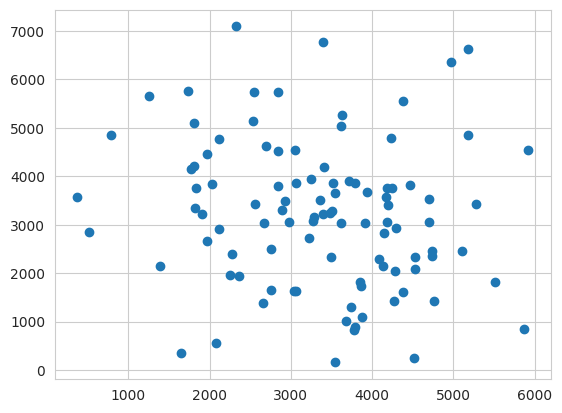

In [20]:
plt.scatter(tourist_sample_w[-1], excursionist_sample_w[-1]);

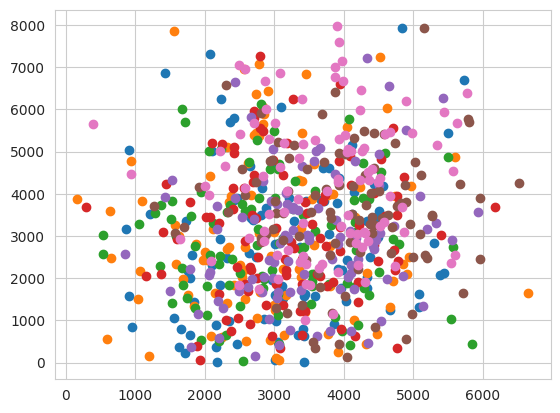

In [21]:
for w in range(7):
    plt.scatter(tourist_sample_w[w], excursionist_sample_w[w]);

In [22]:
tourist_sample_p = {}
excursionist_sample_p = {}
sample_size = 100

for p in meteo_dist.keys():
    stats = tourist_presences_stats[-1, p]
    tourist_sample_p[p] = truncnorm.rvs(-stats['mean'] / stats['std'], 10, loc=stats['mean'], scale=stats['std'], size=sample_size)
    stats = excursionist_presences_stats[-1, p]
    excursionist_sample_p[p] = truncnorm.rvs(-stats['mean'] / stats['std'], 10, loc=stats['mean'], scale=stats['std'], size=sample_size)

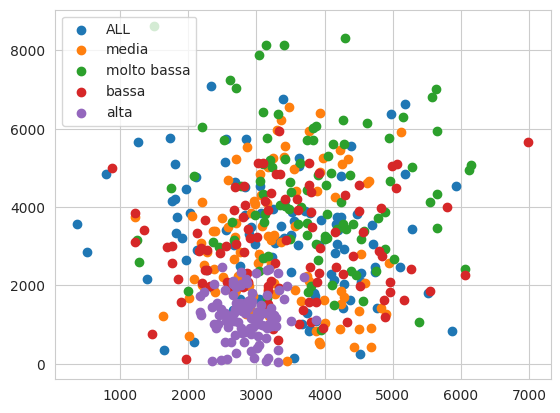

In [23]:
plt.scatter(tourist_sample_w[-1], excursionist_sample_w[-1], label='ALL')
for p in meteo_dist.keys():
    plt.scatter(tourist_sample_p[p], excursionist_sample_p[p], label=p)
    plt.legend()

In [24]:
meteo_dist

{'media': 0.075, 'molto bassa': 0.65, 'bassa': 0.2, 'alta': 0.075}